In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xlrd

In [2]:
df = pd.read_excel('movie_metadata.xls', sheet_name=0)

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_movie_link             5043 non-

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_movie_link               0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
movie_score                    0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Observation 1:
There are plenty of missing values in 'gross' column. We can fill with the mean of the gross, but it may not be very accurate. Let's remove the rows which does not have gross.

In [7]:
df_clean = df[df['gross'].isnull() == False]

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 5042
Data columns (total 28 columns):
color                        4157 non-null object
director_name                4156 non-null object
num_critic_for_reviews       4156 non-null float64
duration                     4157 non-null float64
director_facebook_likes      4156 non-null float64
actor_3_facebook_likes       4146 non-null float64
actor_2_name                 4153 non-null object
actor_1_facebook_likes       4155 non-null float64
gross                        4159 non-null float64
genres                       4159 non-null object
actor_1_name                 4155 non-null object
movie_title                  4159 non-null object
num_voted_users              4159 non-null int64
cast_total_facebook_likes    4159 non-null int64
actor_3_name                 4146 non-null object
facenumber_in_poster         4152 non-null float64
plot_keywords                4119 non-null object
movie_movie_link             4159 non-

In [9]:
df_clean.isnull().sum()

color                          2
director_name                  3
num_critic_for_reviews         3
duration                       2
director_facebook_likes        3
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_movie_link               0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       268
title_year                     3
actor_2_facebook_likes         6
movie_score                    0
aspect_ratio                 105
movie_facebook_likes           0
dtype: int64

In [10]:
# actor3 might not be very important. Let's drop actor_3_name and actor_3_facebook_likes
df_clean = df_clean.drop(['actor_3_facebook_likes', 'actor_3_name'], axis=1)

In [11]:
print(df_clean.info())
print()
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 5042
Data columns (total 26 columns):
color                        4157 non-null object
director_name                4156 non-null object
num_critic_for_reviews       4156 non-null float64
duration                     4157 non-null float64
director_facebook_likes      4156 non-null float64
actor_2_name                 4153 non-null object
actor_1_facebook_likes       4155 non-null float64
gross                        4159 non-null float64
genres                       4159 non-null object
actor_1_name                 4155 non-null object
movie_title                  4159 non-null object
num_voted_users              4159 non-null int64
cast_total_facebook_likes    4159 non-null int64
facenumber_in_poster         4152 non-null float64
plot_keywords                4119 non-null object
movie_movie_link             4159 non-null object
num_user_for_reviews         4158 non-null float64
language                     4156 non-

In [12]:
df_clean['plot_keywords'].value_counts()

1940s|child hero|fantasy world|orphan|reference to peter pan                              3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                       3
animal name in title|ape abducts a woman|gorilla|island|king kong                         3
alien friendship|alien invasion|australia|flying car|mother daughter relationship         3
halloween|masked killer|michael myers|slasher|trick or treat                              3
assistant|experiment|frankenstein|medical student|scientist                               3
basketball|basketball player|boarding school|love|shakespeare's othello                   2
audition|friendship|graduation|high school graduation|love                                2
18 wheeler|mutant|ninja|sewer|turtle                                                      2
duchess|illusionist|magician|prince|supernatural power                                    2
alien invasion|assassin|battle|iron man|soldier                                 

# Observation 2:
**It will take a lot work to decouple plot keywords, categorize, and after these, we still have hard time to make use of the plot keywords. Let's drop the column.**

In [13]:
df_clean = df_clean.drop(['plot_keywords'], axis=1)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 5042
Data columns (total 25 columns):
color                        4157 non-null object
director_name                4156 non-null object
num_critic_for_reviews       4156 non-null float64
duration                     4157 non-null float64
director_facebook_likes      4156 non-null float64
actor_2_name                 4153 non-null object
actor_1_facebook_likes       4155 non-null float64
gross                        4159 non-null float64
genres                       4159 non-null object
actor_1_name                 4155 non-null object
movie_title                  4159 non-null object
num_voted_users              4159 non-null int64
cast_total_facebook_likes    4159 non-null int64
facenumber_in_poster         4152 non-null float64
movie_movie_link             4159 non-null object
num_user_for_reviews         4158 non-null float64
language                     4156 non-null object
country                      4159 non-

In [15]:
df_clean.isnull().sum()

color                          2
director_name                  3
num_critic_for_reviews         3
duration                       2
director_facebook_likes        3
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster           7
movie_movie_link               0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       268
title_year                     3
actor_2_facebook_likes         6
movie_score                    0
aspect_ratio                 105
movie_facebook_likes           0
dtype: int64

In [16]:
df_clean['content_rating'].value_counts()

R            1856
PG-13        1400
PG            611
G              95
Not Rated      57
Unrated        34
Approved       18
X              10
NC-17           6
Passed          3
TV-MA           2
M               2
GP              1
Name: content_rating, dtype: int64

# Observation 3:
Budget might have some impact - fill in with mean might impact on the accuracy. Let's drop the rows which does not have
budget info.

In [17]:
df_clean = df_clean[df_clean['budget'].isnull() == False]

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 25 columns):
color                        3889 non-null object
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
facenumber_in_poster         3885 non-null float64
movie_movie_link             3891 non-null object
num_user_for_reviews         3891 non-null float64
language                     3888 non-null object
country                      3891 non-

In [19]:
df_clean.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
facenumber_in_poster          6
movie_movie_link              0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
movie_score                   0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [20]:
# The null value cells are less than 3%. Just drop all the rows with null values.
df_clean = df_clean.dropna()

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5042
Data columns (total 25 columns):
color                        3774 non-null object
director_name                3774 non-null object
num_critic_for_reviews       3774 non-null float64
duration                     3774 non-null float64
director_facebook_likes      3774 non-null float64
actor_2_name                 3774 non-null object
actor_1_facebook_likes       3774 non-null float64
gross                        3774 non-null float64
genres                       3774 non-null object
actor_1_name                 3774 non-null object
movie_title                  3774 non-null object
num_voted_users              3774 non-null int64
cast_total_facebook_likes    3774 non-null int64
facenumber_in_poster         3774 non-null float64
movie_movie_link             3774 non-null object
num_user_for_reviews         3774 non-null float64
language                     3774 non-null object
country                      3774 non-

In [22]:
# Change to the title_year to integer
df_clean['title_year'] = df_clean['title_year'].astype(int)

In [23]:
# Move_movie_link does not seem to very useful. Let's remove it.
df_clean = df_clean.drop(['movie_movie_link'], axis=1)

# Observation 4:
**Some values in 'genres' column consist of multiple genres. It's hard to use. Let's transform 'genre column. Let's split a row to multiple rows if it has multiple values in 'genres' column.**

In [24]:
# Let's convert the single object string to list of strings if there is/are "|"(s) in the data for easy processing.
df_clean['genres'] = df_clean['genres'].apply(lambda x: x.split("|"))
print(df_clean.head(20))

    color      director_name  num_critic_for_reviews  duration  \
0   Color      James Cameron                   723.0     178.0   
1   Color     Gore Verbinski                   302.0     169.0   
2   Color         Sam Mendes                   602.0     148.0   
3   Color  Christopher Nolan                   813.0     164.0   
5   Color     Andrew Stanton                   462.0     132.0   
6   Color          Sam Raimi                   392.0     156.0   
7   Color       Nathan Greno                   324.0     100.0   
8   Color        Joss Whedon                   635.0     141.0   
9   Color        David Yates                   375.0     153.0   
10  Color        Zack Snyder                   673.0     183.0   
11  Color       Bryan Singer                   434.0     169.0   
12  Color       Marc Forster                   403.0     106.0   
13  Color     Gore Verbinski                   313.0     151.0   
14  Color     Gore Verbinski                   450.0     150.0   
15  Color 

In [25]:
# Get the rest of columns except 'genres' 
cols = list(df_clean.columns)
cols.remove('genres')

In [26]:
# The transformation steps
df_clean = df_clean.genres.apply(pd.Series) \
    .merge(df_clean, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = cols, value_name = "genre") \
    .drop("variable", axis = 1) \
    .dropna()

In [27]:
# Reset index afterwards
df_clean.reset_index(drop=True,inplace=True)
print(df_clean.head())
print()
print(df_clean.info())
print()
print(df_clean.describe())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes      actor_2_name  actor_1_facebook_likes  \
0                      0.0  Joel David Moore                  1000.0   
1                    563.0     Orlando Bloom                 40000.0   
2                      0.0      Rory Kinnear                 11000.0   
3                  22000.0    Christian Bale                 27000.0   
4                    475.0   Samantha Morton                   640.0   

         gross     actor_1_name                                 movie_title  \
0  760505847.0      CCH Pounder                                    Avatar¬†   
1  309404152.0    

# Exploratory Data Analysis

In [28]:
# Let's find out what numerical feature has correlation with gross?
df_clean.corr()['gross'].sort_values(ascending=False)

gross                        1.000000
num_voted_users              0.641981
num_user_for_reviews         0.551770
num_critic_for_reviews       0.477170
movie_facebook_likes         0.373175
actor_2_facebook_likes       0.268379
cast_total_facebook_likes    0.267546
movie_score                  0.237043
duration                     0.214727
actor_1_facebook_likes       0.173908
director_facebook_likes      0.122948
budget                       0.090200
title_year                   0.076305
aspect_ratio                 0.060663
facenumber_in_poster        -0.040710
Name: gross, dtype: float64

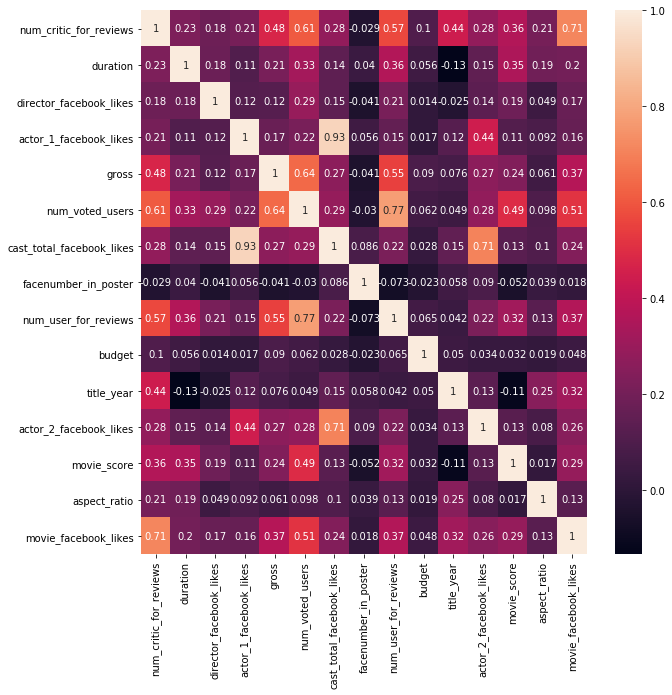

In [30]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_clean.corr(), annot=True, ax=ax);

# Insight 1: 
By looking at the correlation matrix, the numerical features which might be related to the gross are: num_voted_users, num_user_for_reviews, num_critic_for_reviews, and movie_facebook_likes. (correlation coefficient > 0.35). **So moive which have more user/critic reviews(votes) or which can draw attention on the facebook, might attract more people to watch hence contribute to the gross earning.**

---

In [31]:
# Let's group by different categorical feature and see if there any insights there.
g1 = df_clean.groupby('color')['gross'].mean()
g1

color
 Black and White    3.587218e+07
Color               5.802393e+07
Name: gross, dtype: float64

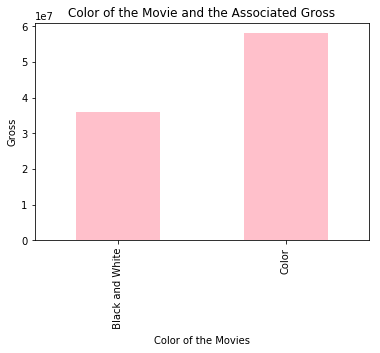

In [32]:
g1.plot(kind='bar', color='pink');
plt.xlabel("Color of the Movies")
plt.ylabel("Gross")
plt.title("Color of the Movie and the Associated Gross");

# Insight 2: 
**Color movie makes more money.**

---

In [33]:
# Let's look at 'language' column.
g2 = df_clean.groupby('language')['gross'].mean()
g2.sort_values(ascending=False)

language
English       5.942508e+07
Maya          5.085989e+07
Aboriginal    3.460111e+07
Spanish       1.018898e+07
Filipino      1.016650e+07
Mandarin      9.533743e+06
Dari          8.462619e+06
Cantonese     7.956420e+06
Hindi         6.501866e+06
Italian       6.040625e+06
Japanese      6.009307e+06
Mongolian     5.701643e+06
Thai          4.999541e+06
French        4.569371e+06
German        4.133350e+06
Persian       3.344314e+06
Zulu          2.912363e+06
None          2.601847e+06
Hebrew        2.283276e+06
Portuguese    2.152617e+06
Indonesian    2.036036e+06
Dutch         1.884888e+06
Russian       1.487477e+06
Korean        1.226085e+06
Romanian      1.185783e+06
Arabic        1.060591e+06
Vietnamese    6.389510e+05
Czech         6.172280e+05
Aramaic       4.992630e+05
Norwegian     4.828322e+05
Danish        4.731973e+05
Bosnian       3.013050e+05
Hungarian     1.958880e+05
Kazakh        7.723100e+04
Name: gross, dtype: float64

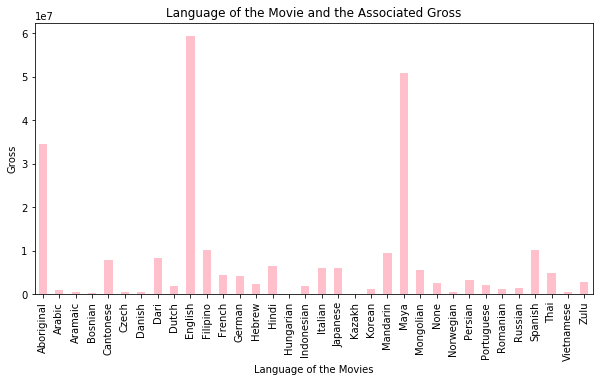

In [34]:
g2.plot(kind='bar', color='pink', figsize=(10,5));
plt.xlabel("Language of the Movies")
plt.ylabel("Gross")
plt.title("Language of the Movie and the Associated Gross");

# Insight 3: 
**Movie in the following languages makes more money: English, Maya, Aboriginal (only listed top 3 languages).**

---

In [35]:
# Let's look at 'country' column.
g3 = df_clean.groupby('country')['gross'].mean()
g3.sort_values(ascending=False)

country
New Zealand       1.208678e+08
Taiwan            7.708611e+07
USA               6.438915e+07
Peru              5.736258e+07
South Africa      5.358008e+07
Australia         4.464977e+07
UK                3.877605e+07
Japan             3.217255e+07
Germany           3.022456e+07
Canada            2.990647e+07
Official site     2.021892e+07
China             1.812087e+07
France            1.789541e+07
Hong Kong         1.591828e+07
Romania           1.385011e+07
Hungary           1.332927e+07
Chile             1.218864e+07
West Germany      1.143313e+07
Spain             1.098373e+07
Mexico            1.096169e+07
Aruba             1.007614e+07
Argentina         9.210026e+06
Ireland           7.809089e+06
New Line          6.712451e+06
Colombia          6.517198e+06
India             6.501866e+06
Russia            5.505255e+06
Indonesia         4.105123e+06
Thailand          3.845838e+06
Greece            3.707794e+06
South Korea       3.569806e+06
Italy             3.386854e+06


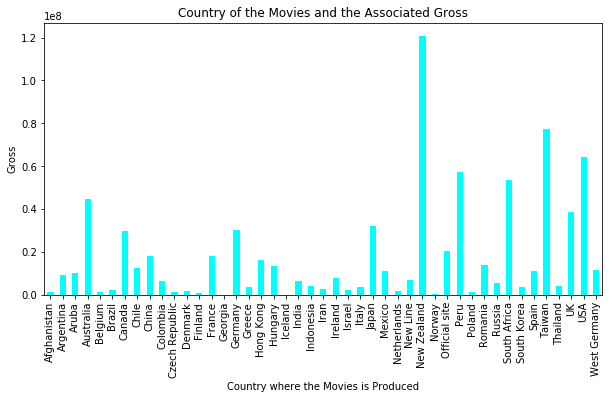

In [36]:
g3.plot(kind='bar', color='cyan', figsize=(10,5));
plt.xlabel("Country where the Movies is Produced")
plt.ylabel("Gross")
plt.title("Country of the Movies and the Associated Gross");

# Insight 4:
**Movie produced in the following country make more money: New Zealand, Taiwan, USA (only listed 3 countries).**

---

In [37]:
# Let's look at content_rating.
g4 = df_clean.groupby('content_rating')['gross'].mean()
g4.sort_values(ascending=False)

content_rating
G            9.243012e+07
PG           8.429563e+07
PG-13        7.231239e+07
M            6.823366e+07
Approved     5.144185e+07
GP           4.380000e+07
R            3.245412e+07
X            2.026832e+07
Passed       1.222059e+07
Unrated      8.063781e+06
Not Rated    3.715278e+06
NC-17        2.521107e+06
Name: gross, dtype: float64

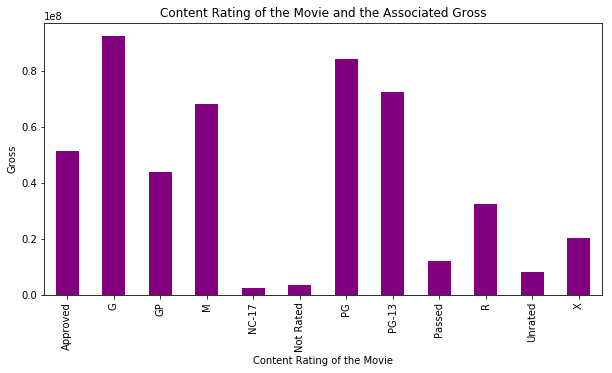

In [38]:
g4.plot(kind='bar', color='purple', figsize=(10,5));
plt.xlabel("Content Rating of the Movie")
plt.ylabel("Gross")
plt.title("Content Rating of the Movie and the Associated Gross");

# Insight 5:
**Movies with the following content-ratings make more money: G, PG, PG-13 (only listed top 3 content-ratings).**

---

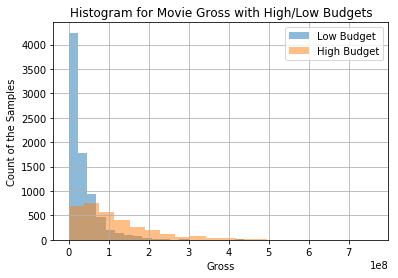

In [39]:
# Let's look at 'budget' column now.
# Divide budget into two groups (low budget, high budget) using the mean value of the budget.
budget_low = df_clean['budget'] <= df_clean['budget'].mean()
budget_high = df_clean['budget'] > df_clean['budget'].mean()
df_clean.gross[budget_low].hist(label='Low Budget', alpha=0.5, bins=20);
df_clean.gross[budget_high].hist(label='High Budget', alpha=0.5, bins=20);
plt.xlabel("Gross");
plt.ylabel("Count of the Samples");
plt.title("Histogram for Movie Gross with High/Low Budgets")
plt.legend();

# Insight 6:
**High budget movie seem to contribute more to high gross movie.**

---

In [40]:
g5 = df_clean.groupby('genre')['gross'].mean()
g5.sort_values(ascending=False)

genre
Animation      1.094193e+08
Adventure      1.008883e+08
Family         9.315267e+07
Fantasy        8.725852e+07
Sci-Fi         8.414436e+07
Action         7.784164e+07
Musical        5.907849e+07
Comedy         5.149708e+07
Thriller       4.878548e+07
Mystery        4.637807e+07
Romance        4.569504e+07
Sport          4.512828e+07
Western        4.348704e+07
War            4.217085e+07
Music          3.982318e+07
Crime          3.924042e+07
Drama          3.795138e+07
History        3.792400e+07
Biography      3.603758e+07
Horror         3.461959e+07
Documentary    1.836719e+07
Film-Noir      7.927000e+03
Name: gross, dtype: float64

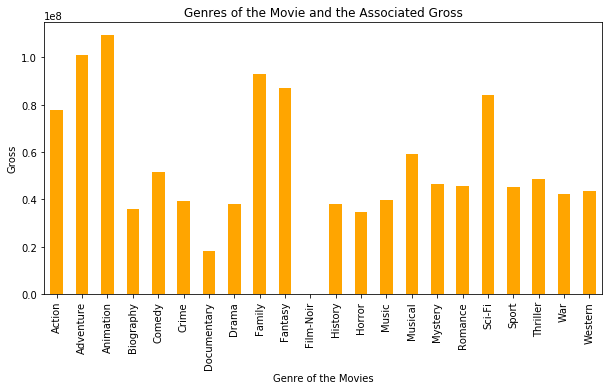

In [45]:
g5.plot(kind='bar', color='orange', figsize=(10,5));
plt.xlabel("Genre of the Movies")
plt.ylabel("Gross")
plt.title("Genres of the Movie and the Associated Gross");

# Insight 7:
**The following movie genres generate higher movie gross: Animation, Adventure, Family. (only list top 3 movie genres).**

---

**Let's find out what's the movie genres which had the most gross earnings in the last 3 years?**

In [50]:
df_last_three_years = df_clean[df_clean['title_year']>=2014]

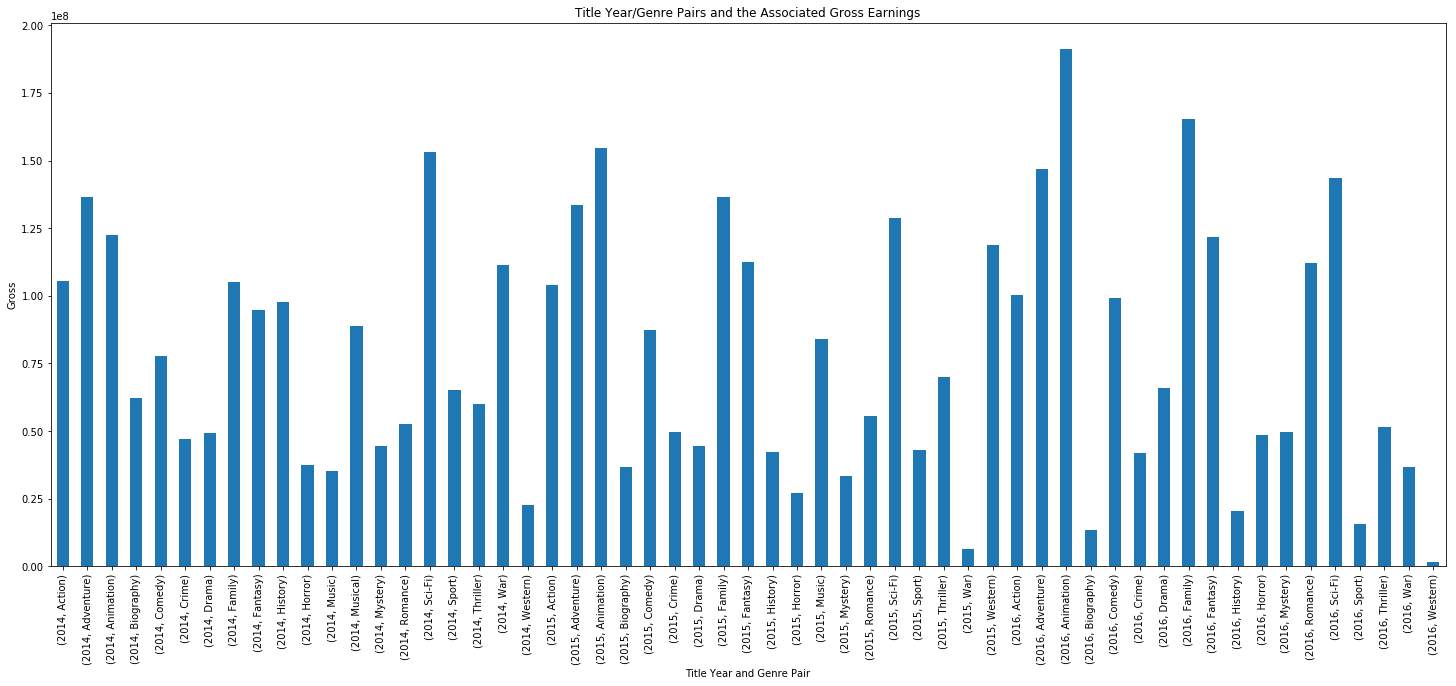

In [53]:
# Let's groupby 'release_year' and 'genre', and get mean on popularity.
g6 = df_last_three_years.groupby(['title_year','genre']).gross.mean()
g6.plot(kind='bar', figsize=(25, 10));
plt.xlabel("Title Year and Genre Pair")
plt.ylabel("Gross")
plt.title("Title Year/Genre Pairs and the Associated Gross Earnings");

# Insight 8:
> - In 2014, the top 3 movie genres which make the most gross earning are: Sci-Fi, Adventure, and Animition.
> - In 2015, the top 3 movie genres which make the most gross earning are: Animation, Family and Adventure.
> - In 2016, the top 3 movie genres which make the most gross earning are: Animation, Family and Adventure.